In [1]:
import numpy as np
import pandas as pd
import os
import copy

In [12]:
STEERED_MODELS = ["google/gemma-2-2b", "meta-llama/Llama-3.2-3B"]


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
to_cat = []
for model in STEERED_MODELS:
    path = os.path.join("../results", model, "Steering", "steering_generations.csv")
    generations_df = pd.read_csv(path)
    generations_df["Model"] = [model.split("/")[-1].capitalize()] * len(generations_df)
    to_cat.append(generations_df)

generations_df = pd.concat(to_cat, axis=0)

In [15]:
generations_df.head(10)

,prefix,steering_concept,multiplier,rank,full_generation,first_token_generation,surprisal,Model
0,Someone beat a drum with a,NaN,NaN,0,stick,stick,1.601562,Gemma-2-2b
1,Someone beat a drum with a,NaN,NaN,1,1,,2.843750,Gemma-2-2b
2,Someone beat a drum with a,NaN,NaN,2,wooden stick,wooden,3.343750,Gemma-2-2b
3,Someone beat a drum with a,NaN,NaN,3,length of 1,length,3.718750,Gemma-2-2b
4,Someone beat a drum with a,NaN,NaN,4,piece of wood,piece,3.843750,Gemma-2-2b
5,Someone beat a drum with a,impossible,3.0,0,drum,drum,3.843750,Gemma-2-2b
6,Someone beat a drum with a,impossible,3.0,1,stick,stick,1.601562,Gemma-2-2b
7,Someone beat a drum with a,impossible,3.0,2,1,,2.843750,Gemma-2-2b
8,Someone beat a drum with a,impossible,3.0,3,beat,beat,3.843750,Gemma-2-2b
9,Someone beat a drum with a,impossible,3.0,4,new song,new,6.968750,Gemma-2-2b


In [24]:
generations_df["Steering Vector"] = ["None" if concept is np.nan else concept.capitalize() for concept in generations_df["steering_concept"]]
generations_df["Surprisal"] = generations_df["surprisal"]
len(generations_df)

1200

In [25]:
plt.figure(figsize=(4, 2))
generations_df = generations_df[generations_df["multiplier"] != 3.0]
generations_df.head(20)

,prefix,steering_concept,multiplier,rank,full_generation,first_token_generation,surprisal,Model,Steering,Surprisal,Steering Vector
0,Someone beat a drum with a,NaN,NaN,0,stick,stick,1.601562,Gemma-2-2b,None,1.601562,None
1,Someone beat a drum with a,NaN,NaN,1,1,,2.843750,Gemma-2-2b,None,2.843750,None
2,Someone beat a drum with a,NaN,NaN,2,wooden stick,wooden,3.343750,Gemma-2-2b,None,3.343750,None
3,Someone beat a drum with a,NaN,NaN,3,length of 1,length,3.718750,Gemma-2-2b,None,3.718750,None
4,Someone beat a drum with a,NaN,NaN,4,piece of wood,piece,3.843750,Gemma-2-2b,None,3.843750,None
10,Someone beat a drum with a,impossible,5.0,0,drum,drum,3.843750,Gemma-2-2b,Impossible,3.843750,Impossible
11,Someone beat a drum with a,impossible,5.0,1,new album,new,6.968750,Gemma-2-2b,Impossible,6.968750,Impossible
12,Someone beat a drum with a,impossible,5.0,2,beat,beat,3.843750,Gemma-2-2b,Impossible,3.843750,Impossible
13,Someone beat a drum with a,impossible,5.0,3,flute,flute,11.000000,Gemma-2-2b,Impossible,11.000000,Impossible
14,Someone beat a drum with a,impossible,5.0,4,song,song,7.093750,Gemma-2-2b,Impossible,7.093750,Impossible


<Figure size 400x200 with 0 Axes>

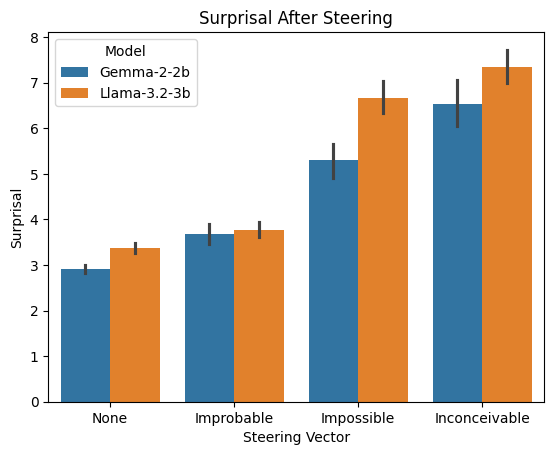

In [27]:
sns.barplot(data=generations_df, x="Steering Vector", y="Surprisal", hue="Model", order=["None", "Improbable", "Impossible", "Inconceivable"])
plt.title("Surprisal After Steering")
plt.savefig("../Figures/App_Steering.pdf", format="pdf")